In [ ]:
# Dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset

# from google.colab import drive
# drive.mount('/content/drive')

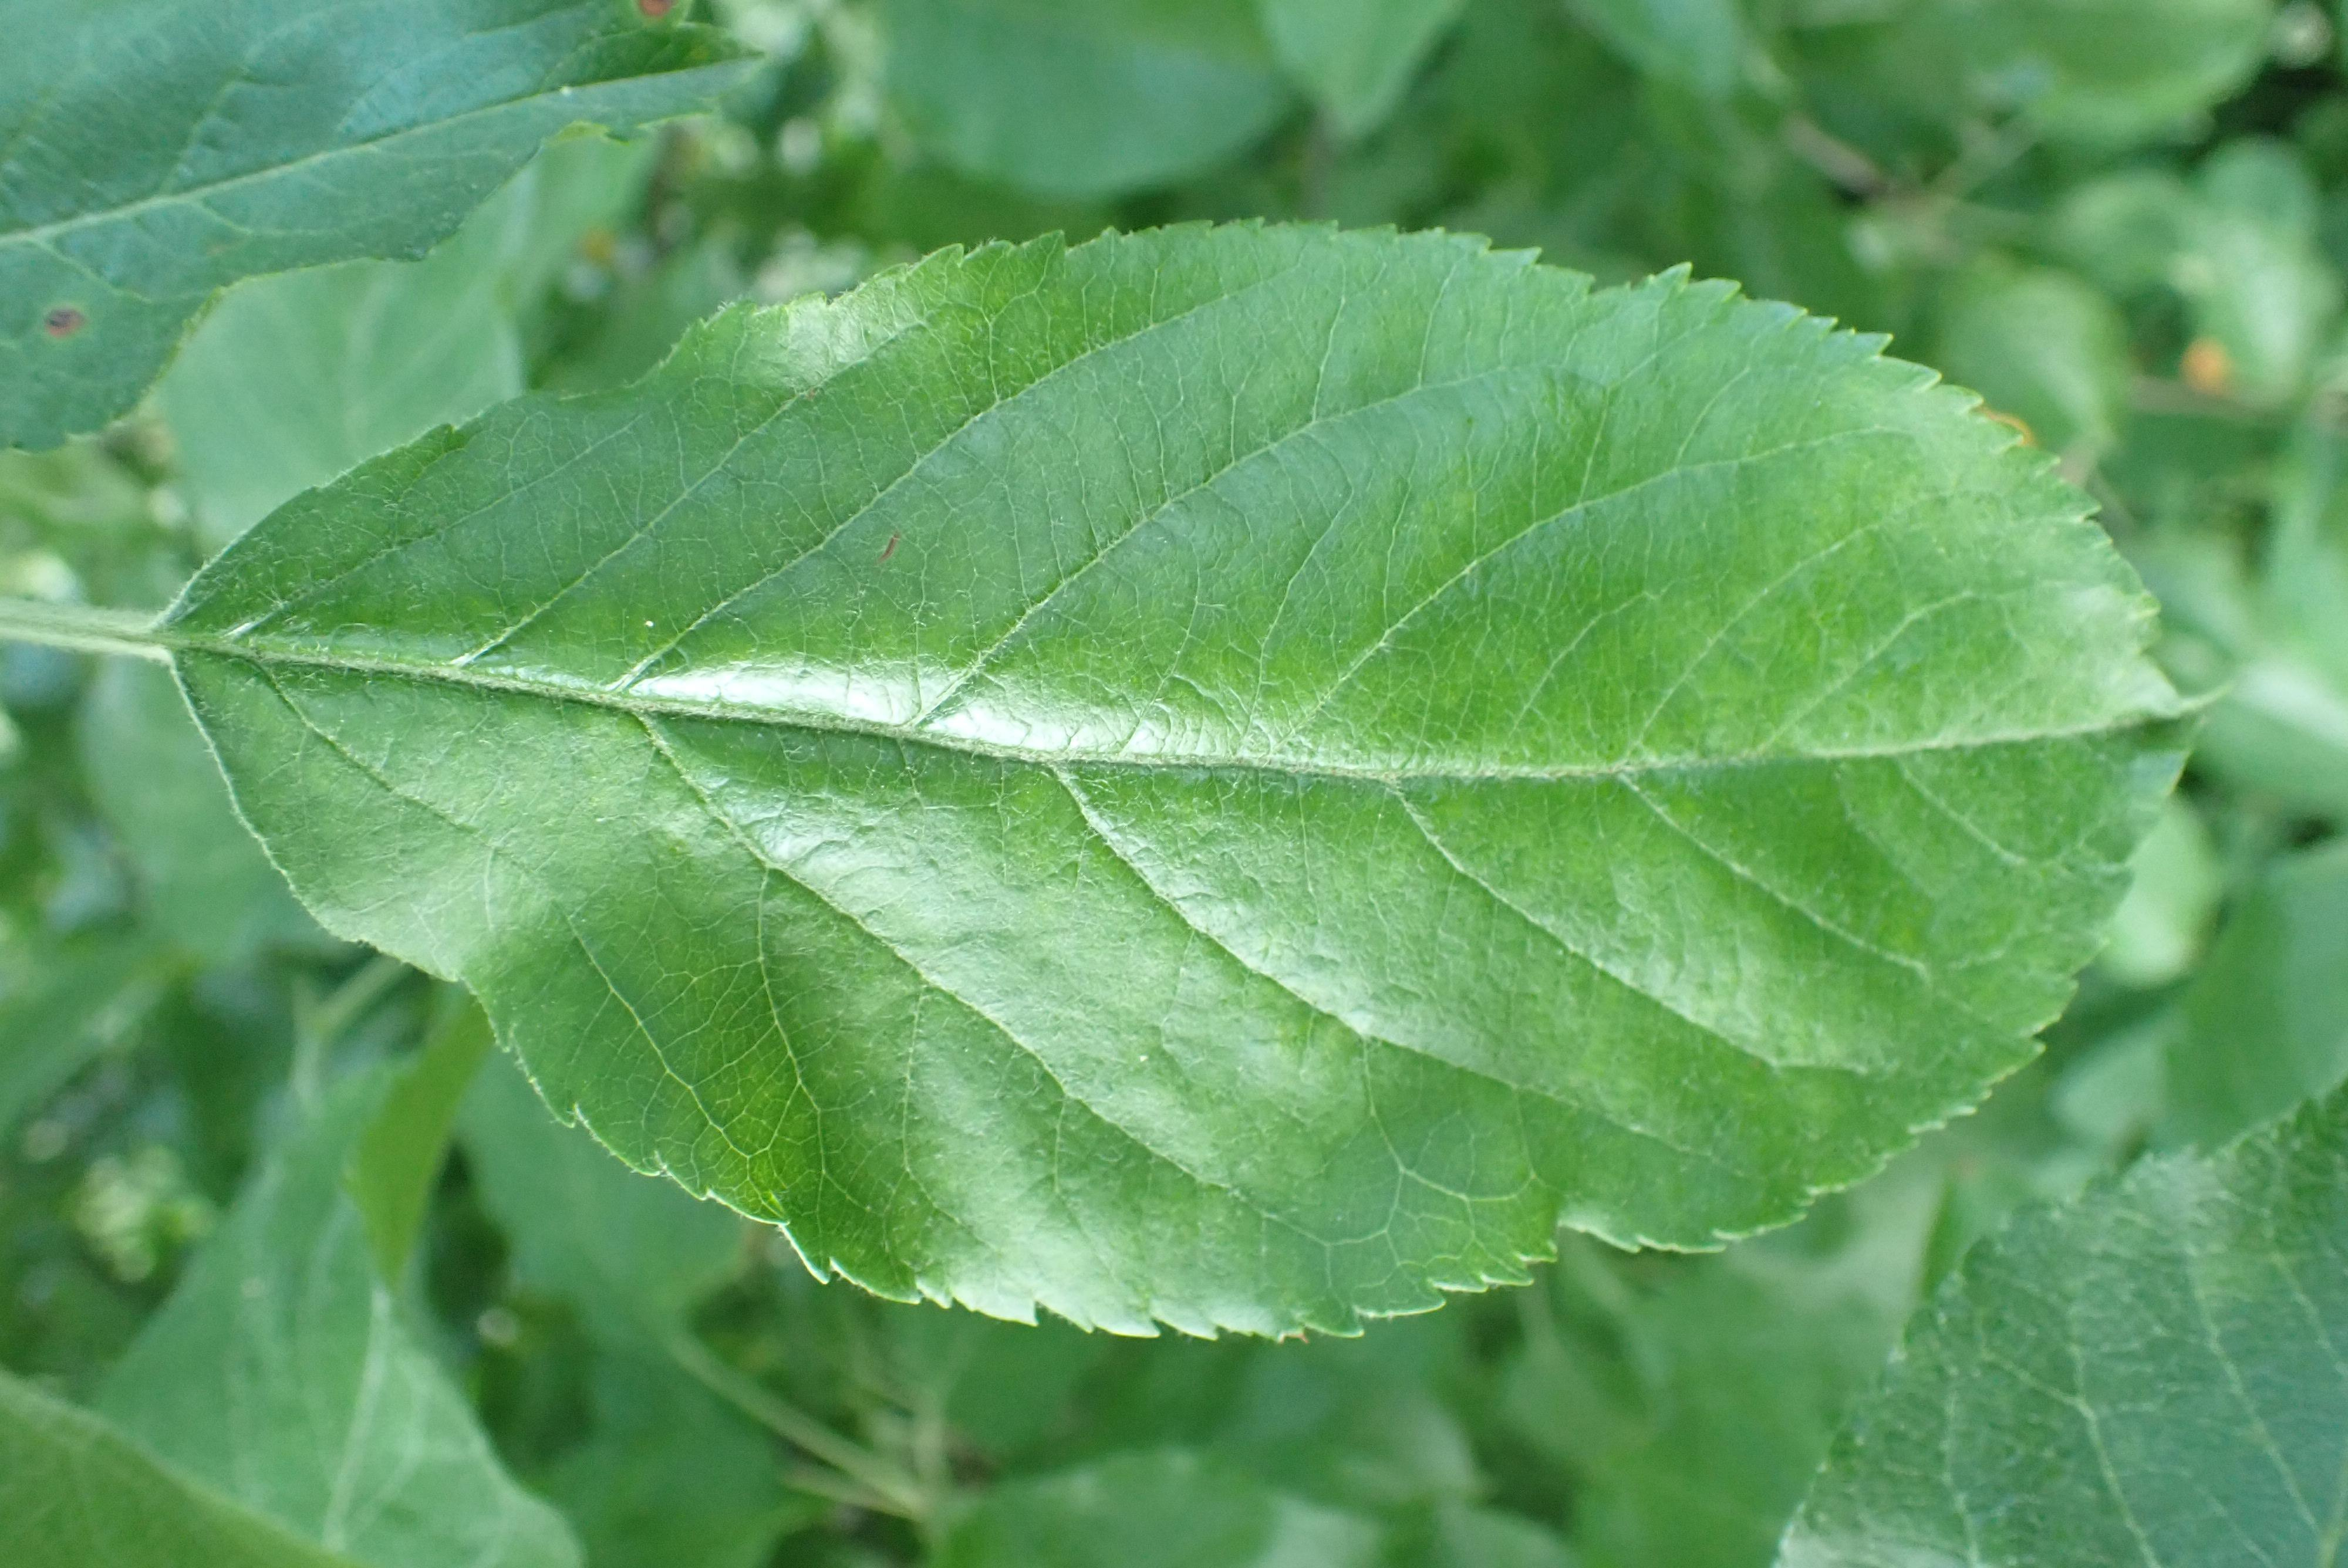

In [61]:
from PIL import Image
import IPython.display as display

image_path = '/content/drive/MyDrive/data/Train/Train/Healthy/8ce77048e12f3dd4.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


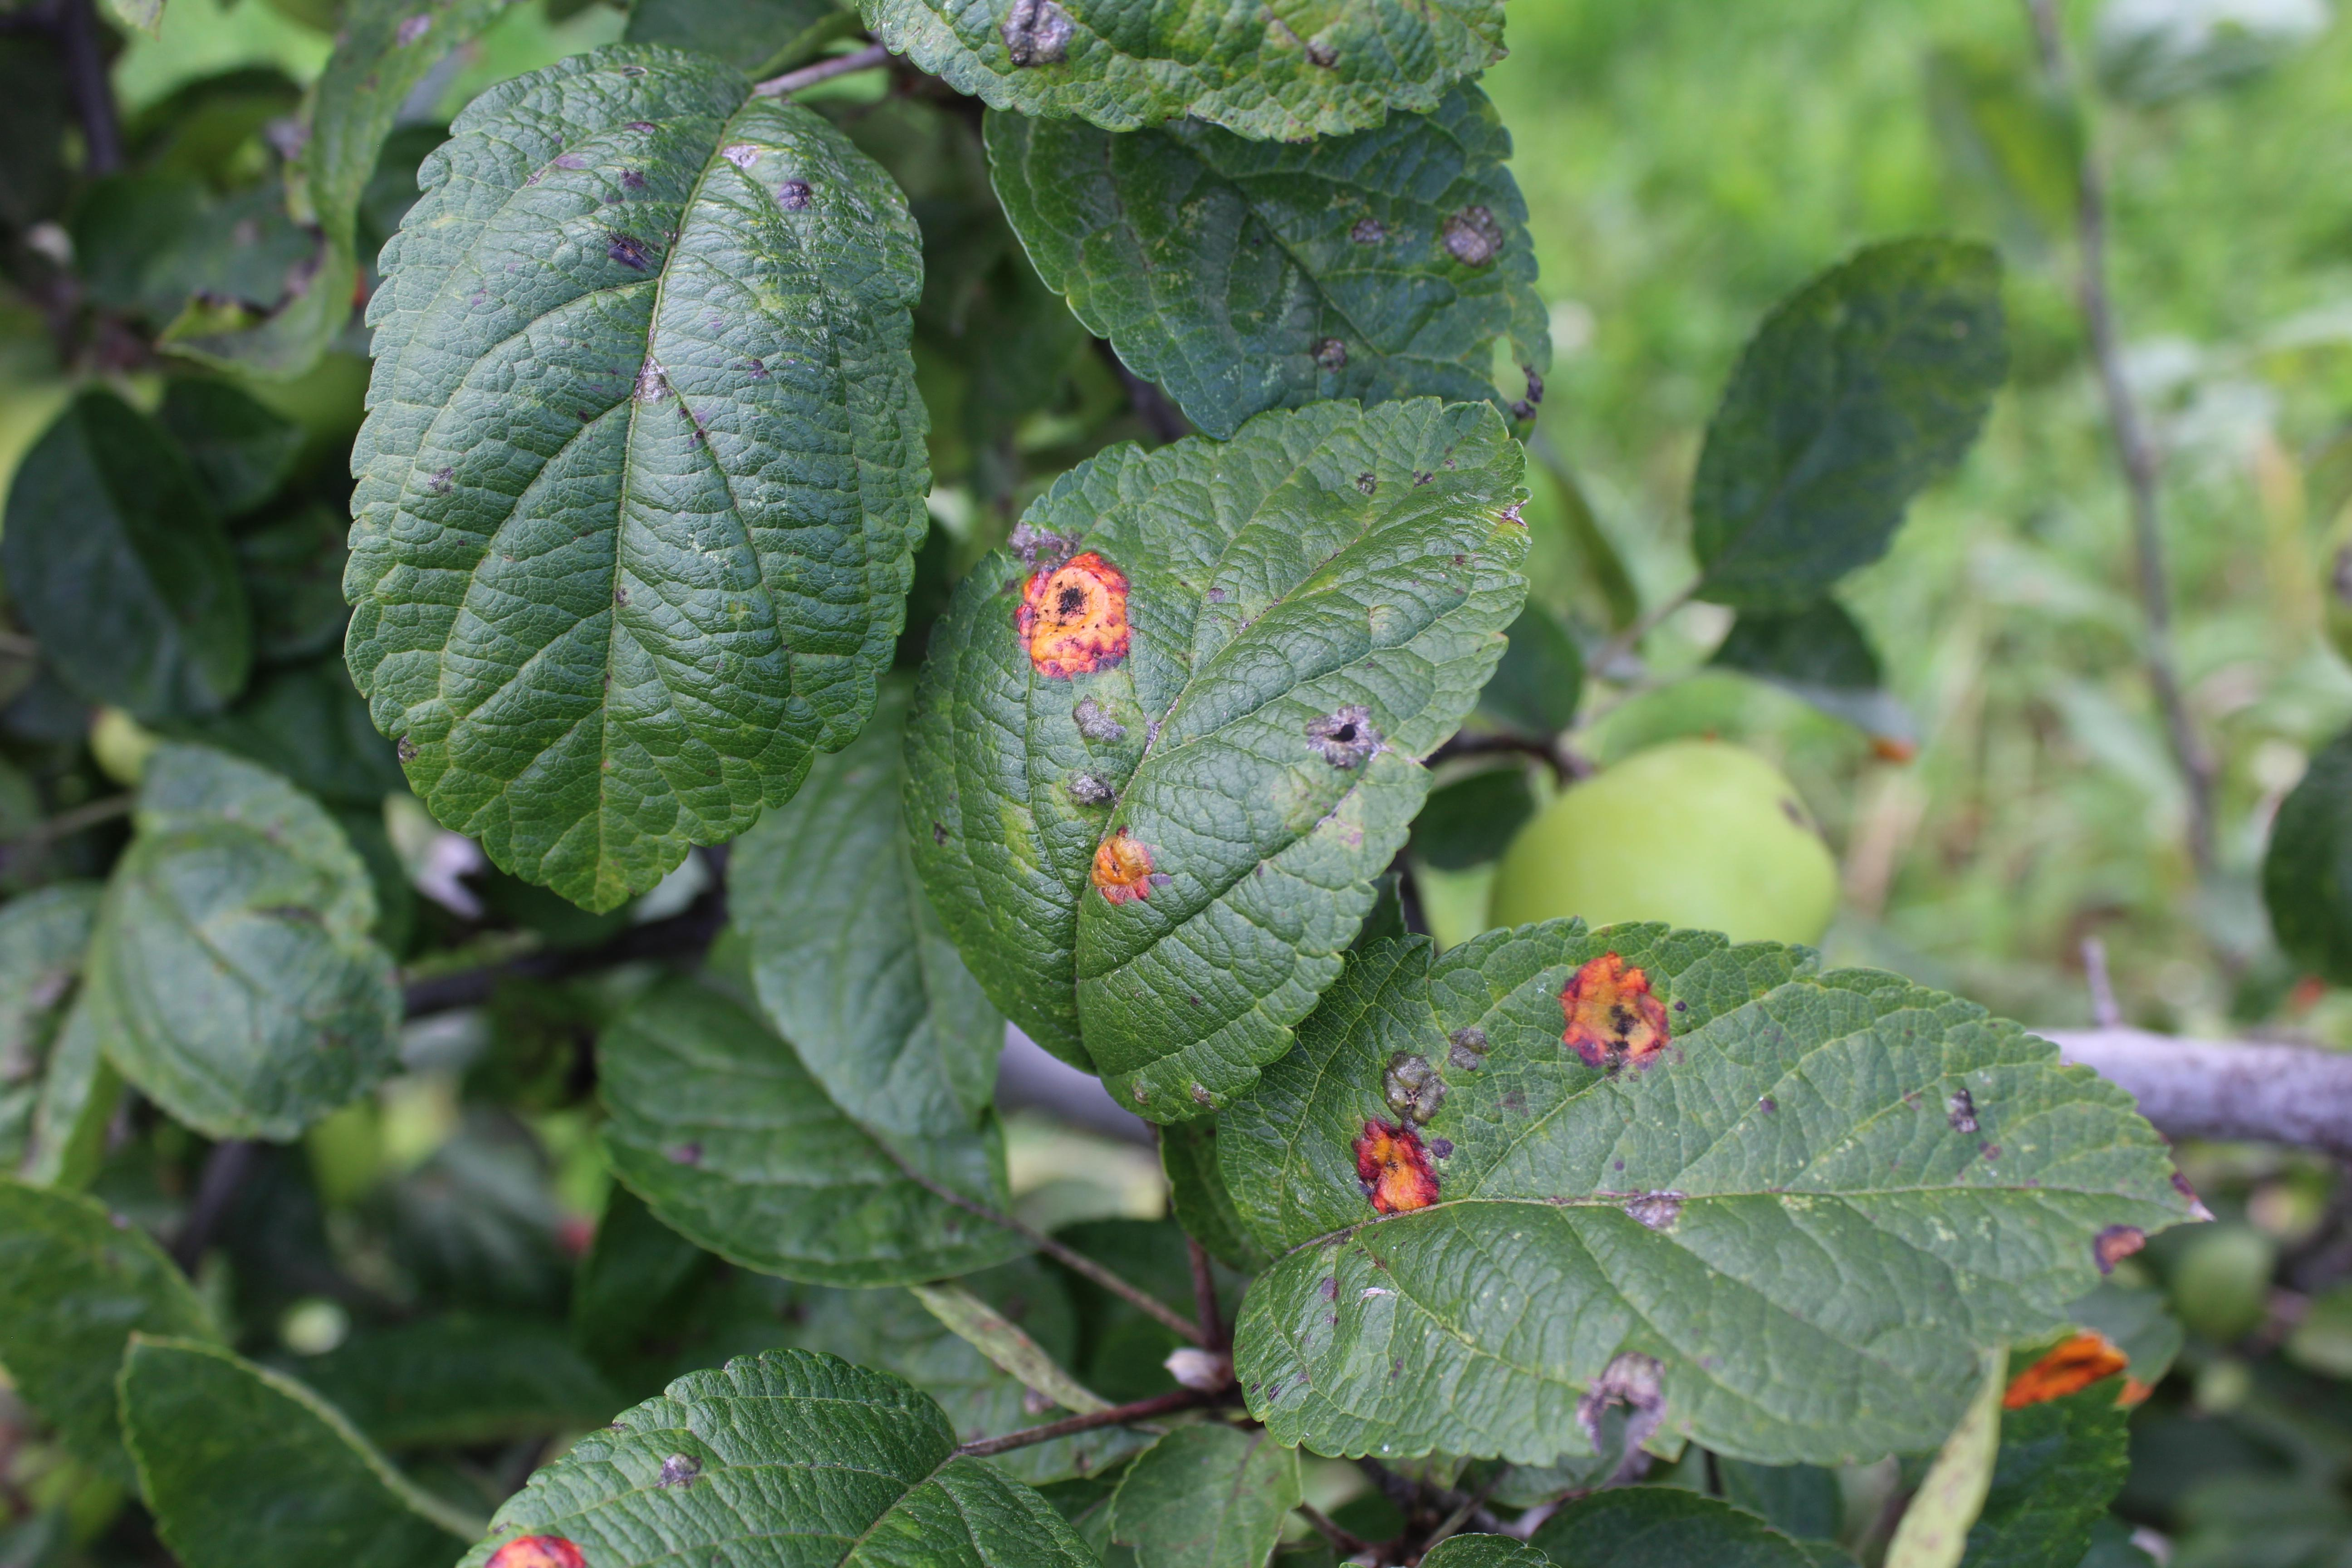

In [62]:
image_path = '/content/drive/MyDrive/data/Train/Train/Rust/81a063b69c99ed9e.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [65]:
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_files_healthy = "/content/drive/MyDrive/data/Train/Train/Healthy"
train_files_powdery = "/content/drive/MyDrive/data/Train/Train/Powdery"
train_files_rust = "/content/drive/MyDrive/data/Train/Train/Rust"

test_files_healthy = "/content/drive/MyDrive/data/Test/Test/Healthy"
test_files_powdery = "/content/drive/MyDrive/data/Test/Test/Powdery"
test_files_rust = "/content/drive/MyDrive/data/Test/Test/Rust"

valid_files_healthy = "/content/drive/MyDrive/data/Validation/Validation/Healthy"
valid_files_powdery = "/content/drive/MyDrive/data/Validation/Validation/Powdery"
valid_files_rust = "/content/drive/MyDrive/data/Validation/Validation/Rust"

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))





Number of healthy leaf images in training set 458
Number of powder leaf images in training set 451
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


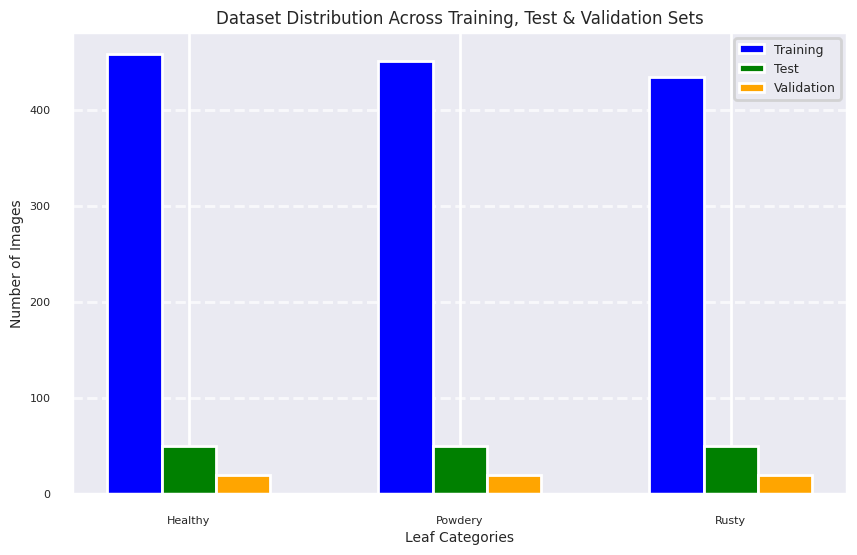

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = ["Healthy", "Powdery", "Rusty"]
training_counts = [total_files(train_files_healthy), total_files(train_files_powdery), total_files(train_files_rust)]
test_counts = [total_files(test_files_healthy), total_files(test_files_powdery), total_files(test_files_rust)]
validation_counts = [total_files(valid_files_healthy), total_files(valid_files_powdery), total_files(valid_files_rust)]

plt.figure(figsize=(10, 6))
x = range(len(categories))

plt.bar(x, training_counts, width=0.2, label="Training", color="blue")
plt.bar([i + 0.2 for i in x], test_counts, width=0.2, label="Test", color="green")
plt.bar([i + 0.4 for i in x], validation_counts, width=0.2, label="Validation", color="orange")

plt.xlabel("Leaf Categories", fontsize=10)
plt.ylabel("Number of Images", fontsize=10)
plt.title("Dataset Distribution Across Training, Test & Validation Sets", fontsize=12)  # Title size
plt.xticks([i + 0.2 for i in x], categories, fontsize=8)  # Smaller x-axis labels
plt.yticks(fontsize=8)
plt.legend(fontsize=9)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/data/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/data/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/data/Test/Test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 1343 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


## Experiment 1: Basic CNN

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(BatchNormalization())  # Normalize activations
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Dropout after pooling to prevent overfitting

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(GlobalAveragePooling2D())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Higher dropout after the dense layer
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 223, 223, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 223, 223, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,595 (400.76 KB)

 Trainable params: 102,147 (399.01 KB)

 Non-trainable params: 448 (1.75 KB)

 **Why is above CNN Architecture Necessary for Leaf Classification?**

Ans. This CNN model is specifically designed to classify leaf images into **three categories**:  
1. **Healthy**  
2. **Powdery (Infected with powdery mildew)**  
3. **Rusty (Infected with rust disease)**  

The architecture is structured to **extract important features**, **prevent overfitting**, and **generalize well on unseen data**.

  1. Convolutional Layers (Feature Extraction)**
- **Conv2D(32, (3,3)) → Conv2D(64, (3,3)) → Conv2D(128, (3,3))**  
- Extracts **patterns, edges, and textures** from images.  
- **Increases filters (32 → 64 → 128)** to learn more complex features.  

  2. Batch Normalization (Speed & Stability)**
- Normalizes activations to **accelerate training** and **stabilize gradients**.  
- Helps in avoiding **exploding or vanishing gradients**.  

 3. Max Pooling (Downsampling)**
- **MaxPooling2D(pool_size=(2,2))** reduces image dimensions while keeping important features.  
- Reduces **computation time** and **prevents overfitting**.  

 4. Dropout (Overfitting Prevention)**
- **Dropout(0.3) in convolutional layers** prevents reliance on specific neurons.  
- **Dropout(0.5) in fully connected layers** improves generalization.  

 5. Global Average Pooling (Efficient Feature Aggregation)**
- Converts feature maps into a **single vector** for classification.  
- Helps prevent overfitting compared to using `Flatten()`.  

 6. Fully Connected Layers (Classification)**
- **Dense(64, activation='relu')** learns high-level patterns.  
- **Dense(3, activation='softmax')** outputs class probabilities.  

 7. Optimizer & Loss Function**
- **Optimizer: Adam()** for efficient weight updates.  
- **Loss: categorical_crossentropy** for multi-class classification.  

 8. Learning Rate Scheduler (Adaptive Learning)**
- **ReduceLROnPlateau** lowers the learning rate if the validation loss stops improving.  


Thus, this architecture is **balanced for accuracy, efficiency, and generalization** in leaf disease classification.


In [78]:
# Training the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1066s 25s/step - accuracy: 0.5708 - loss: 0.9727 - val_accuracy: 0.3333 - val_loss: 1.2034 - learning_rate: 0.0010
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 369s 9s/step - accuracy: 0.7474 - loss: 0.6653 - val_accuracy: 0.3333 - val_loss: 1.3732 - learning_rate: 0.0010
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 366s 9s/step - accuracy: 0.8077 - loss: 0.5173 - val_accuracy: 0.3333 - val_loss: 1.7040 - learning_rate: 0.0010
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 370s 9s/step - accuracy: 0.8282 - loss: 0.4746 - val_accuracy: 0.3333 - val_loss: 2.9310 - learning_rate: 0.0010
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 398s 9s/step - accuracy: 0.8470 - loss: 0.4001 - val_accuracy: 0.3333 - val_loss: 2.9820 - learning_rate: 5.0000e-04
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 441s 9s/step - accuracy: 0.8627 - loss: 0.3776 - val_accuracy: 0.3333 - val_loss: 3.2827 - learning_rate: 5.0000e-04
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 372s 9s/step - accuracy: 0.8952 - loss: 0.2960

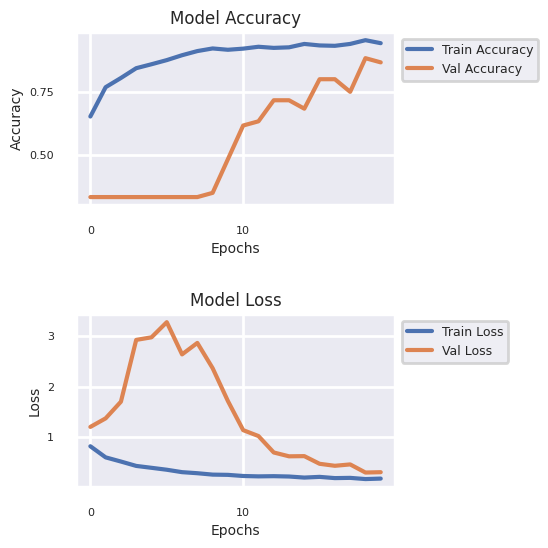

In [85]:
#Visualizing Loss and Accuracy Curves:

import matplotlib.pyplot as plt

def plot_metrics(history):
    plt.figure(figsize=(6, 6))

    # First subplot for accuracy
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy',fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Accuracy',fontsize=10)
    plt.xticks(fontsize=8)  # Smaller x-axis labels
    plt.yticks(fontsize=8)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

    # Second subplot for loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss', fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Loss',  fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)
    plt.xticks(fontsize=8)  # Smaller x-axis labels
    plt.yticks(fontsize=8)

    plt.subplots_adjust(hspace=0.4)

    plt.tight_layout()
    plt.show()

plot_metrics(history)


**Graph Analysis**
---

**Model Accuracy (Top Graph)**
- **Training Accuracy** steadily increases and plateaus near **95%**.
- **Validation Accuracy** remains low initially (**~33%**) but significantly improves after **epoch 10**, reaching **85-90%** by the end.
- This suggests the model initially struggles to generalize but later improves, possibly due to learning important patterns in the data.

**Model Loss (Bottom Graph)**
- **Training Loss** consistently decreases, indicating the model is learning effectively.
- **Validation Loss** initially spikes (**high variance in early epochs**), but after **epoch 10**, it steadily decreases, suggesting the model starts generalizing better.
- The large early fluctuations in **Validation Loss** indicate **overfitting risks** in the initial epochs, but later stabilization suggests proper learning.

**Enhancement**
1. The gap between training and validation accuracy/loss need to be monitored.  Use of **L2 regularization** maybe required in Conv2D layers to reduce overfitting.
2. Early high validation loss suggests **tweaking** batch size, learning rate, etc. may help to stabilize training sooner.


**Conclusion:**
 The model struggles early (**low validation accuracy**) but learns well after **epoch 10**, suggesting **feature learning over time**. CNN architecture need to be redefined for better result.



5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


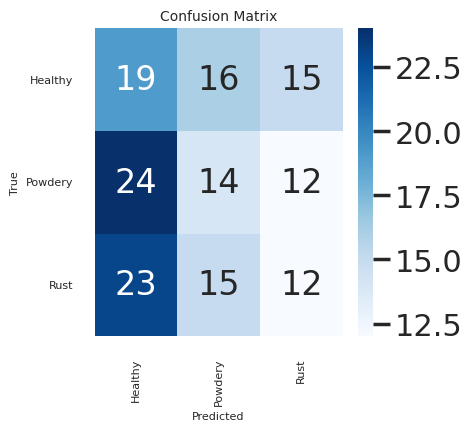

In [89]:
# Creating a confusion Matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix',fontsize=10)
plt.xlabel('Predicted',fontsize=8)
plt.ylabel('True',fontsize=8)
plt.xticks(fontsize=8)  # Smaller x-axis labels
plt.yticks(fontsize=8)
plt.show()


In [91]:
#classification report
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)


              precision    recall  f1-score   support

     Healthy       0.29      0.38      0.33        50
     Powdery       0.31      0.28      0.29        50
        Rust       0.31      0.24      0.27        50

    accuracy                           0.30       150
   macro avg       0.30      0.30      0.30       150
weighted avg       0.30      0.30      0.30       150



**Conclusion (based on classification report above)**
1. Low precision and recall across all classes suggest that the model struggles to differentiate between categories.
2. Rust class has the lowest recall **(0.24)**, meaning many actual Rust cases are being misclassified.
3. The **model** is only **slightly better** than random guessing (**33% for 3 classes**), indicating poor performance.

5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step


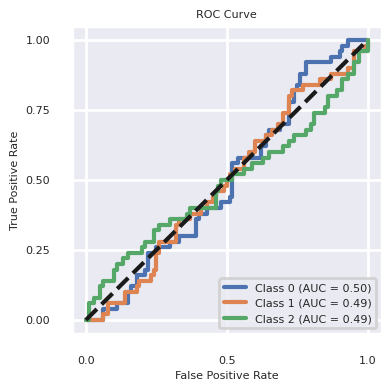

In [96]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
y_pred_prob = model.predict(test_generator)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ploting ROC curve
plt.figure(figsize=(4, 4))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate',fontsize=8)
plt.ylabel('True Positive Rate',fontsize=8)
plt.title('ROC Curve',fontsize=8)
plt.legend(loc='lower right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


In [41]:
model.save("final_model.h5")

## Experiment 2: L2-regularized CNN

*Steps taken:*

1. Ensured uniform target_size=225x225 across generators
2. **Optimized CNN architecture with L2 regularization**
3.  Improved dropout placement to reduce overfitting

In [4]:
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Define base directory
BASE_DIR = "/content/drive/MyDrive/data"

train_dir = os.path.join(BASE_DIR, "Train/Train")
valid_dir = os.path.join(BASE_DIR, "Validation/Validation")
test_dir = os.path.join(BASE_DIR, "Test/Test")

def total_files(folder_path):
    """Count number of image files in a given directory."""
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Print dataset statistics
for category in ["Healthy", "Powdery", "Rust"]:
    print(f"Training {category}: {total_files(os.path.join(train_dir, category))}")
    print(f"Validation {category}: {total_files(os.path.join(valid_dir, category))}")
    print(f"Test {category}: {total_files(os.path.join(test_dir, category))}")
    print("=" * 50)

# ImageDataGenerator setup
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(225, 225),  # Fixed size to be consistent
    batch_size=32,
    class_mode='categorical'
)

# Model architecture with L2 regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(225, 225, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Prevent overfitting
    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)


Training Healthy: 458
Validation Healthy: 20
Test Healthy: 50
Training Powdery: 451
Validation Powdery: 20
Test Powdery: 50
Training Rust: 434
Validation Rust: 20
Test Rust: 50
Found 1343 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 223, 223, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,595 (400.76 KB)

 Trainable params: 102,147 (399.01 KB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 578s 14s/step - accuracy: 0.6529 - loss: 1.0626 - val_accuracy: 0.3333 - val_loss: 1.5498 - learning_rate: 0.0010
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 398s 8s/step - accuracy: 0.8136 - loss: 0.7072 - val_accuracy: 0.3333 - val_loss: 1.8738 - learning_rate: 0.0010
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 333s 8s/step - accuracy: 0.8583 - loss: 0.6129 - val_accuracy: 0.3333 - val_loss: 2.1543 - learning_rate: 0.0010
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 330s 8s/step - accuracy: 0.8668 - loss: 0.5432 - val_accuracy: 0.3333 - val_loss: 2.1926 - learning_rate: 0.0010
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 324s 8s/step - accuracy: 0.8982 - loss: 0.5026 - val_accuracy: 0.3333 - val_loss: 2.2920 - learning_rate: 5.0000e-04
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 379s 8s/step - accuracy: 0.9034 - loss: 0.4731 - val_accuracy: 0.3333 - val_loss: 3.2990 - learning_rate: 5.0000e-04
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 311s 7s/step - accuracy: 0.9069 - loss: 0.4643 

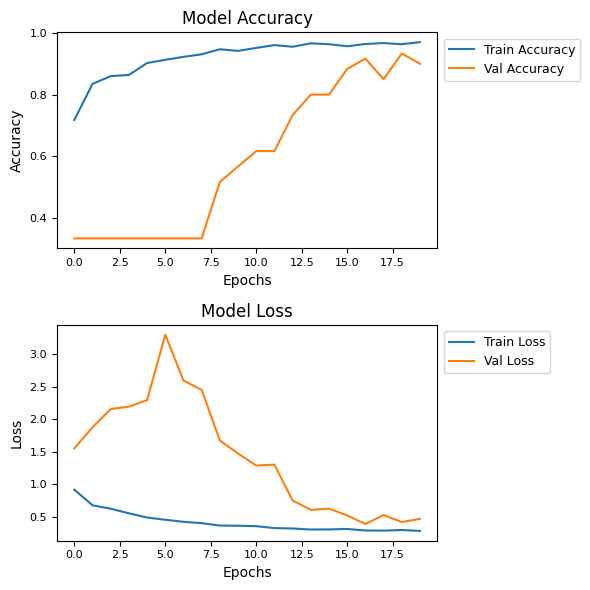

In [5]:
#Visualizing Loss and Accuracy Curves:

import matplotlib.pyplot as plt

def plot_metrics(history):
    plt.figure(figsize=(6, 6))

    # First subplot for accuracy
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy',fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Accuracy',fontsize=10)
    plt.xticks(fontsize=8)  # Smaller x-axis labels
    plt.yticks(fontsize=8)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

    # Second subplot for loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss', fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Loss',  fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)
    plt.xticks(fontsize=8)  # Smaller x-axis labels
    plt.yticks(fontsize=8)

    plt.subplots_adjust(hspace=0.4)

    plt.tight_layout()
    plt.show()

plot_metrics(history)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 10s/step


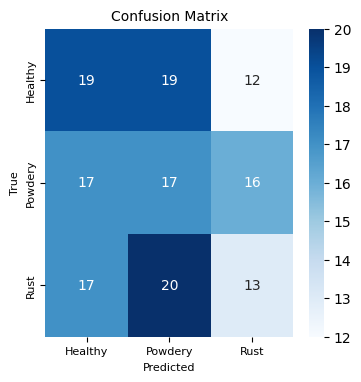

In [6]:
# Creating a confusion Matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix',fontsize=10)
plt.xlabel('Predicted',fontsize=8)
plt.ylabel('True',fontsize=8)
plt.xticks(fontsize=8)  # Smaller x-axis labels
plt.yticks(fontsize=8)
plt.show()


In [7]:
#classification report
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)


              precision    recall  f1-score   support

     Healthy       0.36      0.38      0.37        50
     Powdery       0.30      0.34      0.32        50
        Rust       0.32      0.26      0.29        50

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150



In [ ]:
# with l2 regualtion
model.save("final_model_1.h5")

## Experiment 3: Transfer learning-based EfficientNetB0 model

In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Define base directory
BASE_DIR = "/content/drive/MyDrive/data"
train_dir = os.path.join(BASE_DIR, "Train/Train")
valid_dir = os.path.join(BASE_DIR, "Validation/Validation")
test_dir = os.path.join(BASE_DIR, "Test/Test")

# ImageDataGenerator setup
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # EfficientNet expects 224x224
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


# Load EfficientNetB0 as a base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)  # 3 classes (Healthy, Powdery, Rust)

# Build the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train model
history = model.fit(
    train_generator,
    epochs=10,  # Fewer epochs needed due to transfer learning
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)

# Unfreeze the base model for fine-tuning
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune model
history_fine_tune = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)

Found 1343 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,213,926 (16.07 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 219s 5s/step - accuracy: 0.3645 - loss: 1.1356 - val_accuracy: 0.3333 - val_loss: 1.1079 - learning_rate: 0.0010
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 198s 5s/step - accuracy: 0.3445 - loss: 1.1063 - val_accuracy: 0.3333 - val_loss: 1.0989 - learning_rate: 0.0010
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 197s 5s/step - accuracy: 0.3440 - loss: 1.1027 - val_accuracy: 0.3333 - val_loss: 1.0987 - learning_rate: 0.0010
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 196s 5s/step - accuracy: 0.3200 - loss: 1.1005 - val_accuracy: 0.3333 - val_loss: 1.0987 - learning_rate: 0.0010
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 198s 5s/step - accuracy: 0.3488 - loss: 1.0985 - val_accuracy: 0.3333 - val_loss: 1.0986 - learning_rate: 0.0010
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.3148 - loss: 1.0990 - val_accuracy: 0.3333 - val_loss: 1.0986 - learning_rate: 0.0010
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 190s 5s/step - accuracy: 0.3308 - loss: 1.0986 - val_acc

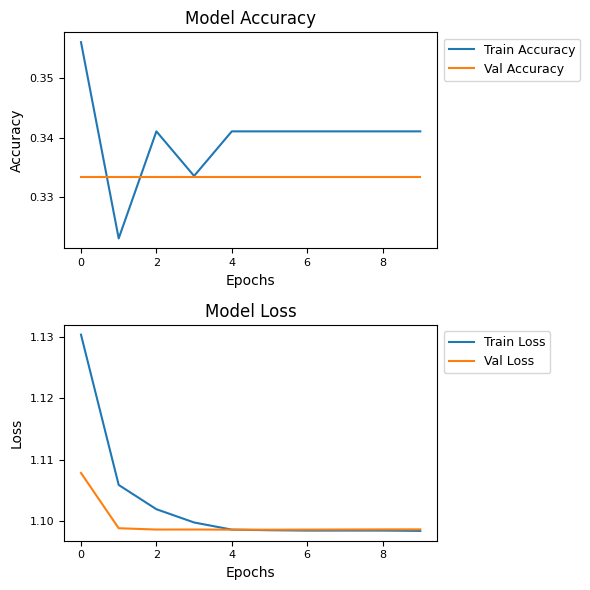

In [9]:
#Visualizing Loss and Accuracy Curves:

import matplotlib.pyplot as plt

def plot_metrics(history):
    plt.figure(figsize=(6, 6))

    # First subplot for accuracy
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy',fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Accuracy',fontsize=10)
    plt.xticks(fontsize=8)  # Smaller x-axis labels
    plt.yticks(fontsize=8)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

    # Second subplot for loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss', fontsize=12)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Loss',  fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)
    plt.xticks(fontsize=8)  # Smaller x-axis labels
    plt.yticks(fontsize=8)

    plt.subplots_adjust(hspace=0.4)

    plt.tight_layout()
    plt.show()

plot_metrics(history)


5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step


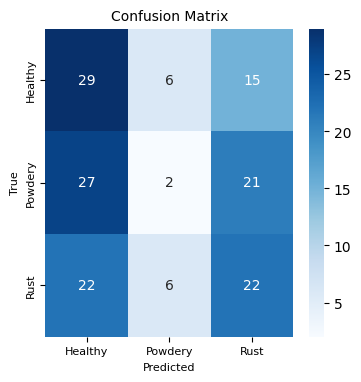

In [10]:
# Creating a confusion Matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix',fontsize=10)
plt.xlabel('Predicted',fontsize=8)
plt.ylabel('True',fontsize=8)
plt.xticks(fontsize=8)  # Smaller x-axis labels
plt.yticks(fontsize=8)
plt.show()


In [11]:
#classification report
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(report)


              precision    recall  f1-score   support

     Healthy       0.37      0.58      0.45        50
     Powdery       0.14      0.04      0.06        50
        Rust       0.38      0.44      0.41        50

    accuracy                           0.35       150
   macro avg       0.30      0.35      0.31       150
weighted avg       0.30      0.35      0.31       150



In [12]:
# model result
model.save("final_model_2.h5")

# Conclusion

The experimental results indicate a progressive improvement in accuracy as the model architecture evolved. The transition from a basic CNN (first experiment) to an L2-regularized CNN (second experiment) and finally to a transfer learning-based EfficientNetB0 model (third experiment) contributed to better performance, particularly in recognizing Healthy and Rust classes.

**Key Observations:**

1) Improvement in Accuracy: The EfficientNetB0 model achieved the highest accuracy (35%), suggesting that transfer learning is beneficial.

2) Powdery Class Struggles: The model consistently struggled with Powdery class classification, indicating possible data imbalance or feature overlap.

3) Regularization and Dropout Effects: L2 regularization helped stabilize the model, but the performance gain was minor. Dropout reduced overfitting but may have hindered learning in early layers.

4) Transfer Learning Boost: EfficientNetB0 demonstrated strong generalization despite fewer epochs, highlighting the benefits of pre-trained models.

## Future Enhancements

To further enhance model performance, the following improvements are suggested:

1) Dataset Quality & Expansion:

* Collecting more diverse samples, particularly for the Powdery class.

* Increasing dataset size to improve model robustness.

* Enhancing image quality and augmentation techniques for better variations.

2) Advanced Model Architectures:

* Experimenting with EfficientNetV2 or Vision Transformers (ViTs) for better feature extraction.

* Using ensemble methods to combine CNNs and pre-trained models.

* Fine-tuning more layers of the EfficientNet model instead of keeping it frozen.

3) Hyperparameter Tuning:

* Optimizing learning rates, batch sizes, and dropout rates.

* Implementing early stopping and advanced schedulers for better convergence.

4) Feature Engineering & Preprocessing:

* Exploring texture-based features using traditional image processing techniques.

* Using attention mechanisms to focus on key regions of the plant leaves.